## Configure sweep on 10 MW turbine with specified shear/veer rates

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import os
import pickle
import numpy as np
from wrf_io import *
from scipy.io import savemat

In [10]:
opt_params={}

opt_params['allocation']     = 'ATM170028' 
opt_params['partition']      = 'spr' 
opt_params['runtime']        = '12:00:00'
opt_params['system']         = 'stampede'
opt_params['num_nodes']      = 2

opt_params['exclude_time']   = 7
opt_params['save_interval']  = 10

opt_params['base_dir']       = '/scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train'

opt_params['gp_dir']         = '/scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/'

opt_params['wrf_path']       = '/work2/09909/smata/stampede3/WRF_LES'
opt_params['template_path']  = '/scratch/09909/smata/wrf_les_sweep/templates'
opt_params['turb_model']     = 'iea10MW'
opt_params['rotor_model']    = 'GAD'
opt_params['slice_loc']      = 1
   
opt_params['print_table']    = True
   
opt_params['plot_outer']     = True
opt_params['save_outer']     = False
opt_params['outer_align']    = False
   
opt_params['plot_inner']     = True
opt_params['save_inner']     = False
   
opt_params['save_both']      = False
opt_params['outer_pad']      = 75

opt_params['plot_profiles']  = True
opt_params['save_profiles']  = True

opt_params['batch_submit']   = True

opt_params['prof_type']      = 'Idealized'
opt_params['shear_type']     = 'Rate'

# Train
opt_params['shear']          = [-0.025,-0.015,0,0.015,0.025]
opt_params['veer']           = [-0.2,-0.13,-0.067,0,0.067,0.13,0.2]

opt_params['Ufst']           = 7

opt_params['excluded_pairs'] = []

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Parameter                                 ┃                  Value ┃ Issue ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ TIME CONTROL AND SETUP                    │                        │       │
│                                           │                        │       │
│ Run time                                  │            00:00:09:00 │       │
│                                           │                        │       │
│ Outer dt                                  │               0.40 sec │       │
│ Inner dt                                  │               0.04 sec │       │
│                                           │                        │       │
│ Processes                                 │                     77 │       │
├───────────────────────────────────────────┼────────────────────────┼───────┤
│ TURBINE                                   │                        │       │
│                                           │                        │       │
│ Model                                     │                iea10MW │       │
│ Diameter                                  │               199.00 m │       │
│ Hub diameter                              │                 4.80 m │       │
│ Inner domain x location                   │               2.01 x D │       │
│ Turbine x location                        │               4.22 x D │       │
│ z location                                │                378.0 m │       │
├───────────────────────────────────────────┼────────────────────────┼───────┤
│ ROTOR                                     │                        │       │
│                                           │                        │       │
│ Model                                     │                    GAD │       │
│ Rotation                                  │              clockwise │       │
│ Sections                                  │                    160 │       │
│ Elements                                  │                     30 │       │
│                                           │                        │       │
│ nSeries                                   │                   4800 │       │
│                                           │                        │       │
│ V0 location                               │                0.8 x D │   >3D │
│                                           │                        │       │
│ Shapiro                                   │                     ON │       │
├───────────────────────────────────────────┼────────────────────────┼───────┤
│ DOMAIN                                    │                        │       │
│                                           │                        │       │
│ Outer mesh size                           │              4,172,157 │       │
│ Inner mesh Size                           │             10,373,077 │       │
│ Mesh ratio                                │                   2.49 │       │
│                                           │                        │       │
│ Outer dx, dy                              │         [40.0, 40.0] m │       │
│ Inner dx, dy                              │         [ 4.0,  4.0] m │       │
│ dz                                        │                 4.04 m │       │
│                                           │                        │       │
│ Outer [Lx, Ly, Lz]                        │ [40.4, 22.3,  3.8] x D │       │
│ Inner [Lx, Ly, Lz]                        │ [ 4.4,  5.0,  3.8] x D │       │
│                                           │                        │       │
│ Outer [Nx, Ny, Nz]                        │     [ 201,  111,  187] │       │
│ Inner [Nx, Ny, Nz]                        │     [ 221,  251,  187] │       │
│                                           │                        │       │
│ Lateral blockage                          │     

s00_vn20
s00_vn15
s00_vn10
s00_vn05
s00_v00
s00_v05
s00_v10
s00_v15
s00_v20
Done.


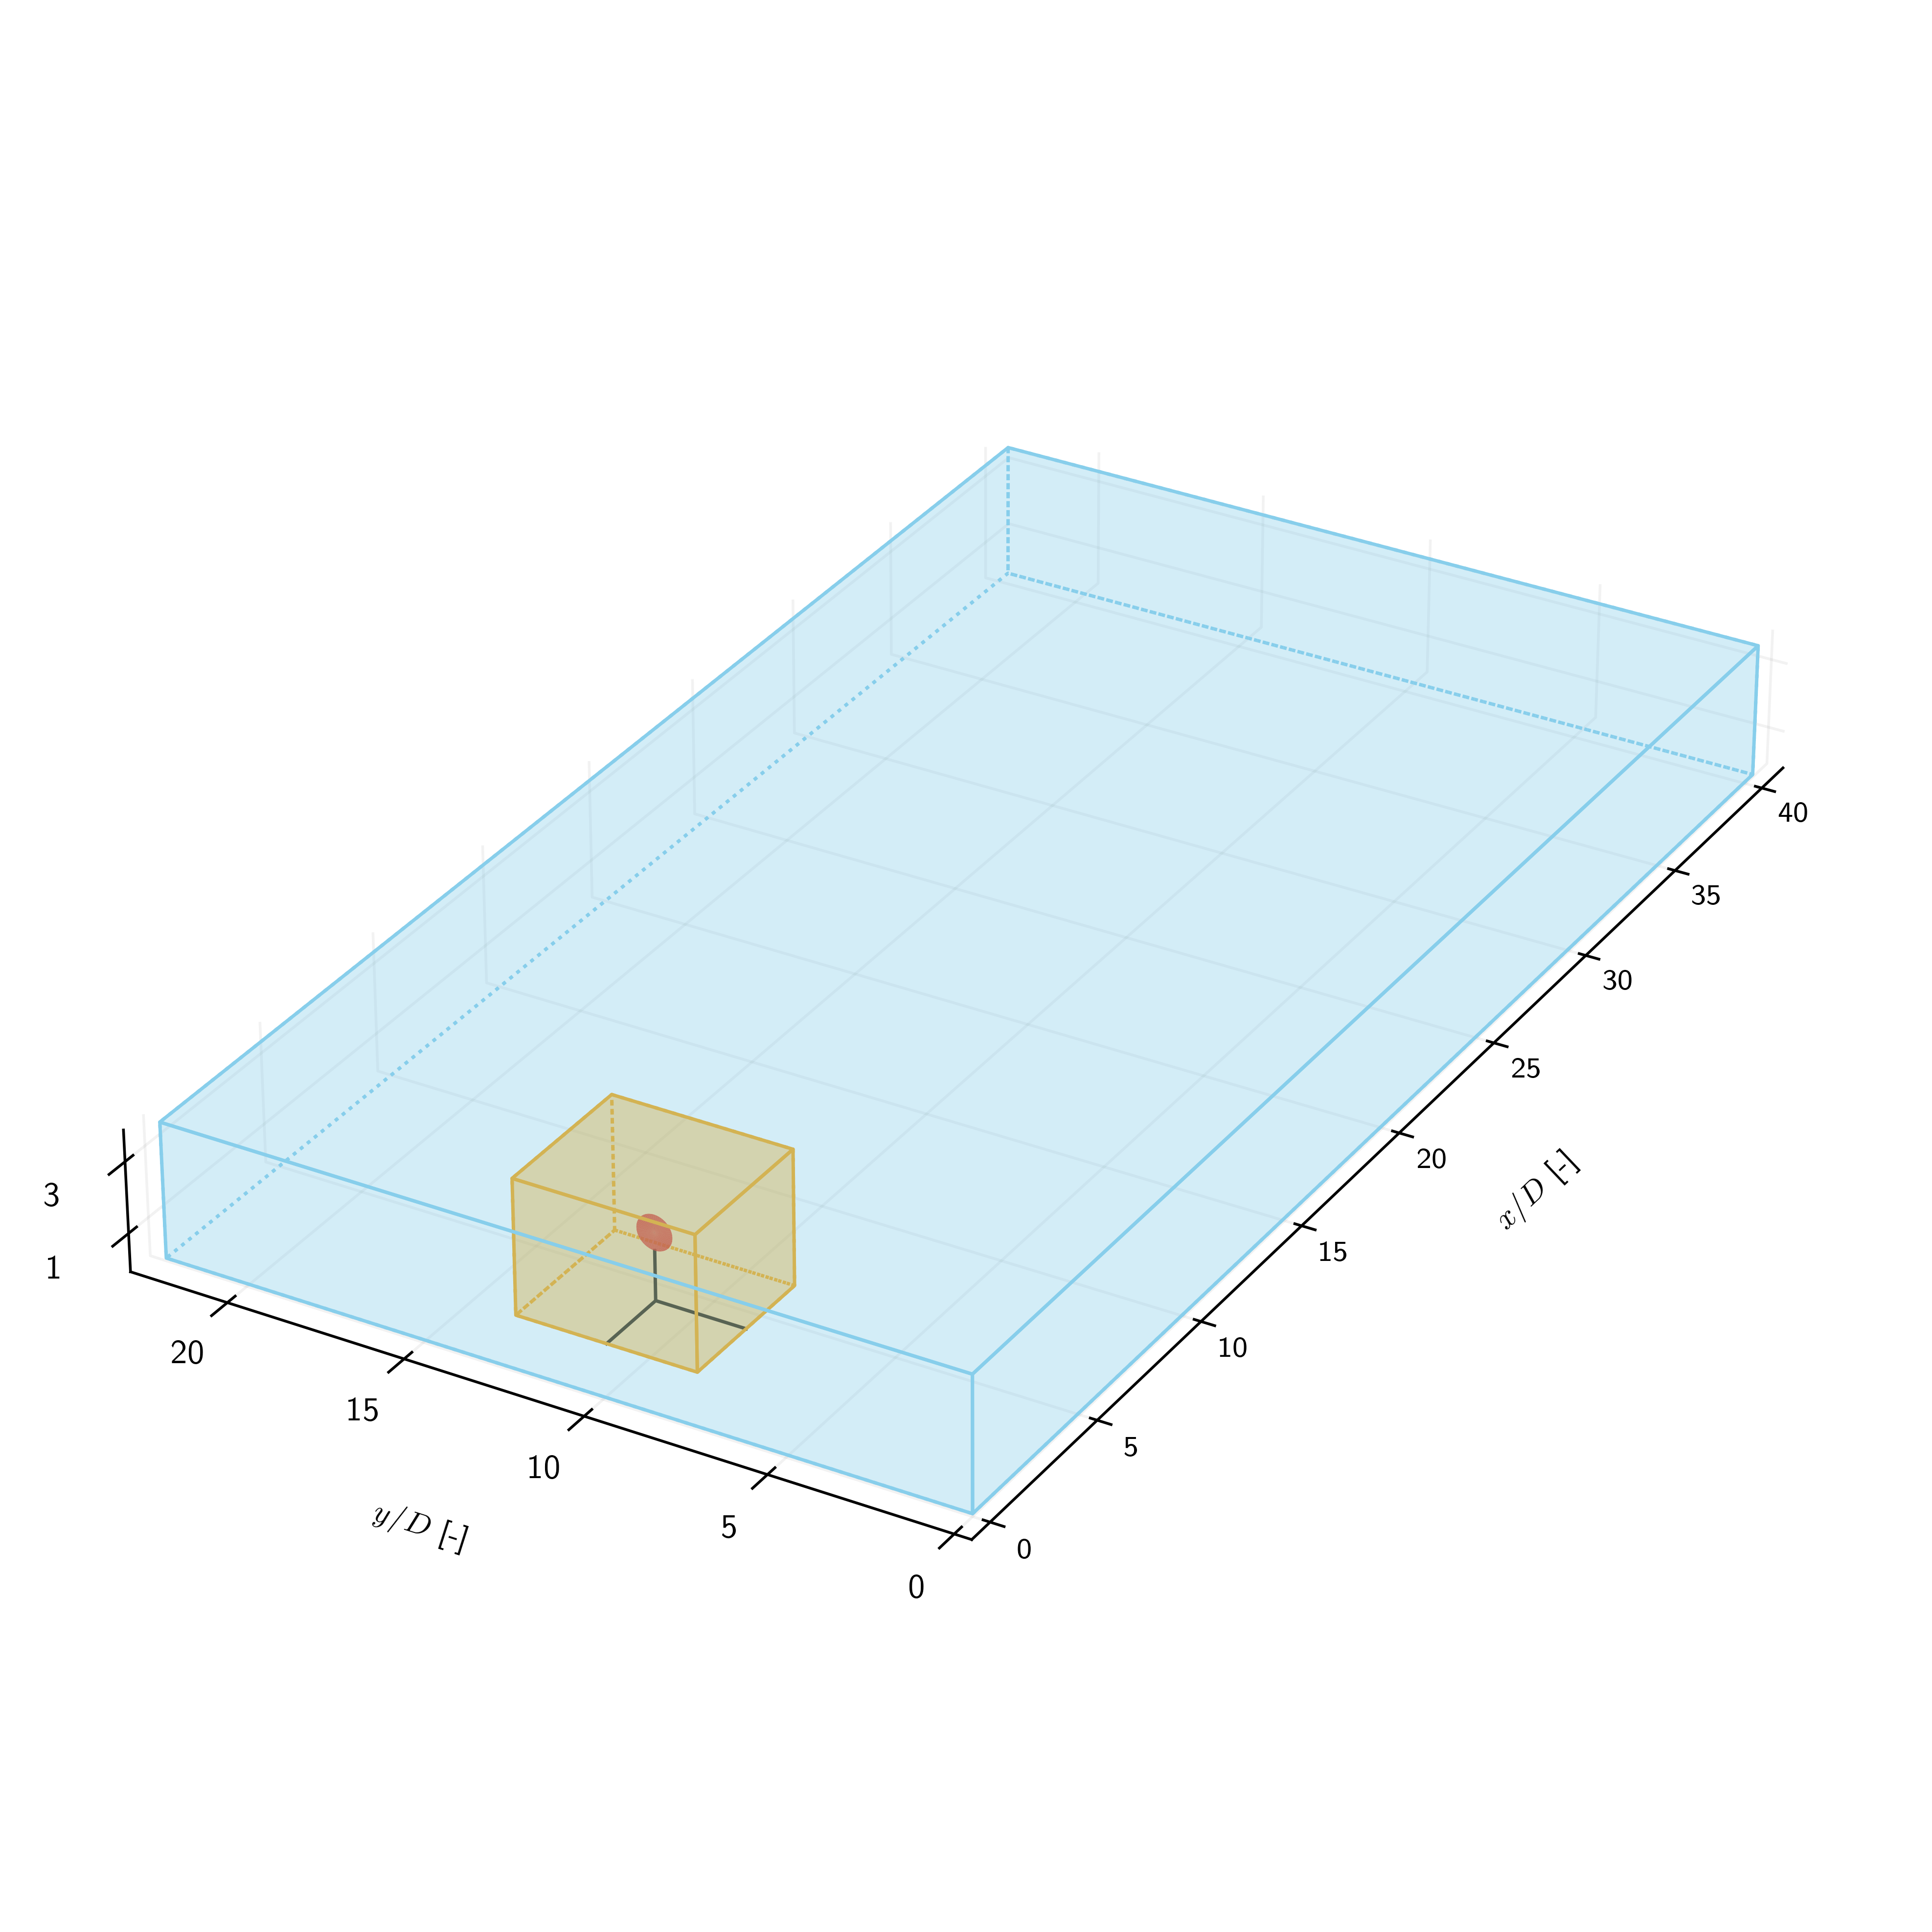

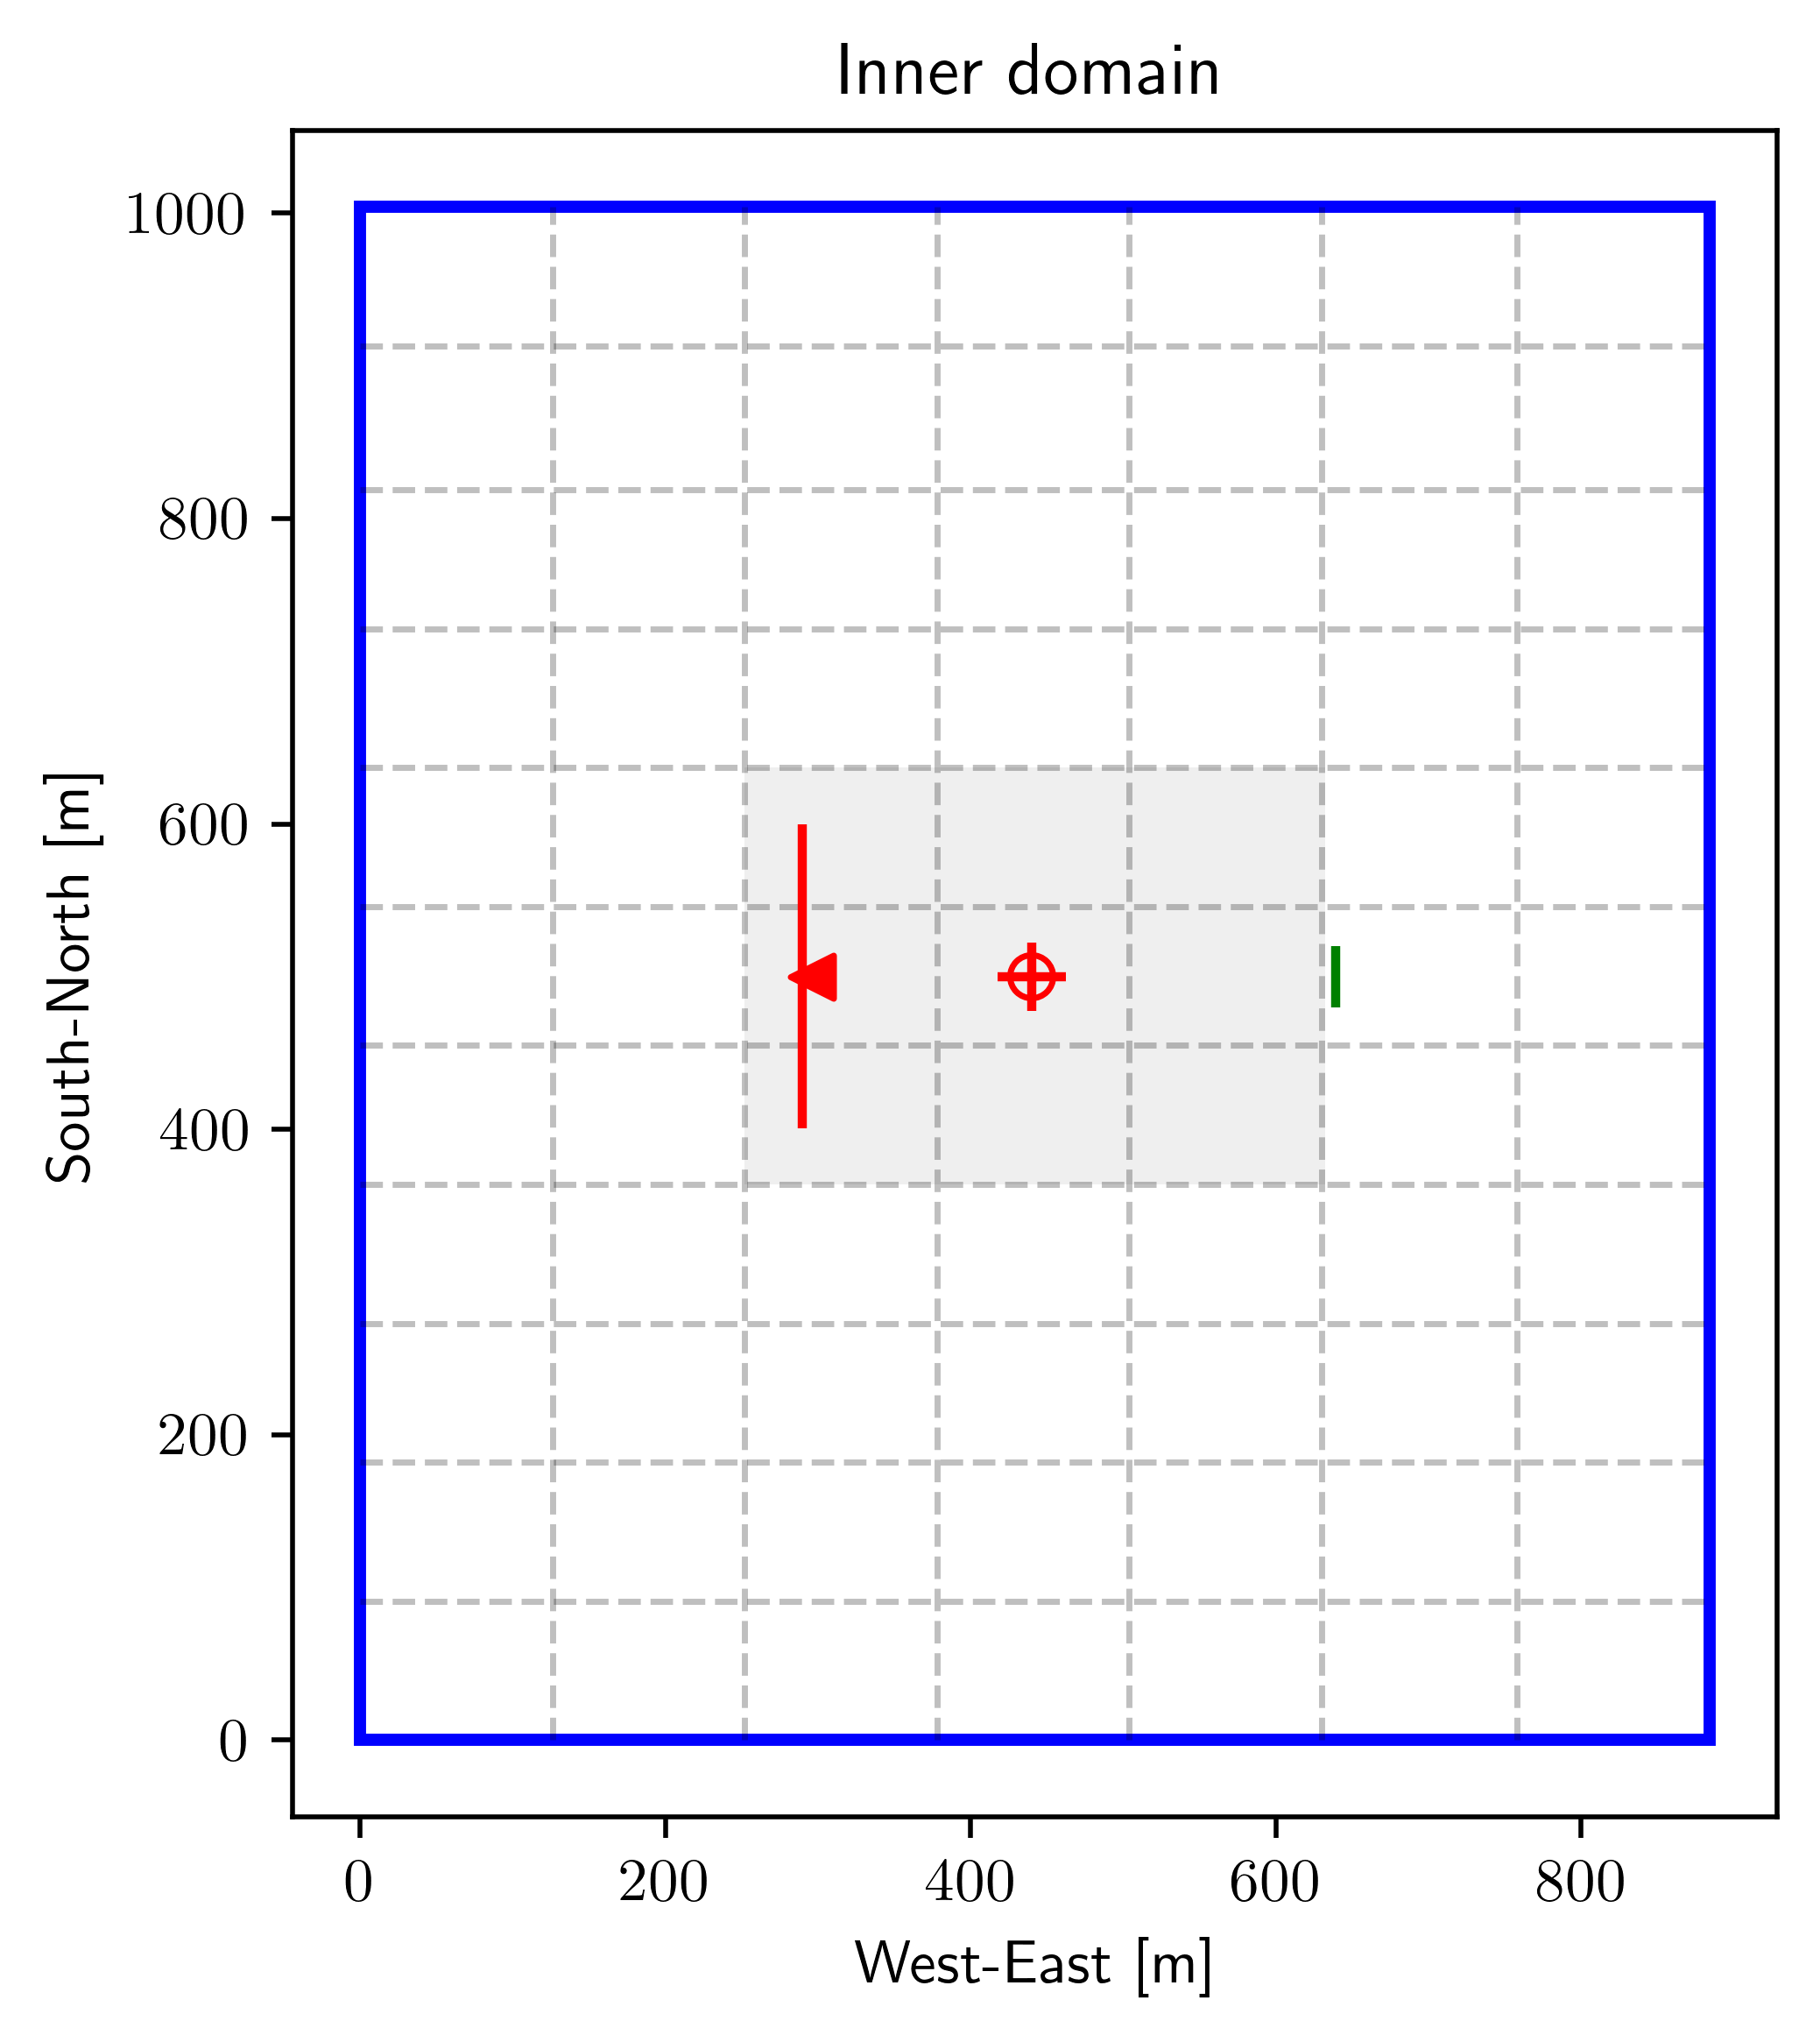

In [7]:
flag = sweep.setup(opt_params, 'GAD')

In [ ]:
postproc.convergence(opt_params)

In [4]:
postproc.parproc(5, opt_params, 'fast')

Preparing to process these files:

 1. s000_v000/wrfout_d02_0001-01-01_00_00_00
 2. s000_v067/wrfout_d02_0001-01-01_00_00_00
 3. s000_v130/wrfout_d02_0001-01-01_00_00_00
 4. s000_v200/wrfout_d02_0001-01-01_00_00_00
 5. s000_vn067/wrfout_d02_0001-01-01_00_00_00
 6. s000_vn130/wrfout_d02_0001-01-01_00_00_00
 7. s000_vn200/wrfout_d02_0001-01-01_00_00_00
 8. s015_v000/wrfout_d02_0001-01-01_00_00_00
 9. s015_v067/wrfout_d02_0001-01-01_00_00_00
10. s015_v130/wrfout_d02_0001-01-01_00_00_00
11. s015_v200/wrfout_d02_0001-01-01_00_00_00
12. s015_vn067/wrfout_d02_0001-01-01_00_00_00
13. s015_vn130/wrfout_d02_0001-01-01_00_00_00
14. s015_vn200/wrfout_d02_0001-01-01_00_00_00
15. s025_v000/wrfout_d02_0001-01-01_00_00_00
16. s025_v067/wrfout_d02_0001-01-01_00_00_00
17. s025_v130/wrfout_d02_0001-01-01_00_00_00
18. s025_v200/wrfout_d02_0001-01-01_00_00_00
19. s025_vn067/wrfout_d02_0001-01-01_00_00_00
20. s025_vn130/wrfout_d02_0001-01-01_00_00_00
21. s025_vn200/wrfout_d02_0001-01-01_00_00_00
22. sn015_v000/wrfout_d02_0001-01-01_00_00_00
23. sn015_v067/wrfout_d02_0001-01-01_00_00_00
24. sn015_v130/wrfout_d02_0001-01-01_00_00_00
25. sn015_v200/wrfout_d02_0001-01-01_00_00_00
26. sn015_vn067/wrfout_d02_0001-01-01_00_00_00
27. sn015_vn130/wrfout_d02_0001-01-01_00_00_00
28. sn015_vn200/wrfout_d02_0001-01-01_00_00_00
29. sn025_v000/wrfout_d02_0001-01-01_00_00_00
30. sn025_v067/wrfout_d02_0001-01-01_00_00_00
31. sn025_v130/wrfout_d02_0001-01-01_00_00_00
32. sn025_v200/wrfout_d02_0001-01-01_00_00_00
33. sn025_vn067/wrfout_d02_0001-01-01_00_00_00
34. sn025_vn130/wrfout_d02_0001-01-01_00_00_00
35. sn025_vn200/wrfout_d02_0001-01-01_00_00_00

Processing WRF outputs with 5 parallel processes...


Working on s000_vn067...
Working on s000_v000...
Working on s000_vn200...
Working on s015_v067...
Working on s000_v130...







Working on s015_v000...
Working on s000_v067...


Working on s015_v130...
Working on s000_v200...


Working on s000_vn130...

Working on s015_v200...

Working on s015_vn130...

Working on s025_v000...

Working on s025_v130...

Working on s025_vn067...

Working on s025_v067...

Working on s015_vn067...

Working on s015_vn200...

Working on s025_v200...

Working on s025_vn130...

Working on s025_vn200...

Working on sn015_v067...

Working on sn015_v200...

Working on sn015_vn130...

Working on sn025_v000...

Working on sn015_v130...

Working on sn015_v000...

Working on sn015_vn067...

Working on sn015_vn200...

Working on sn025_v067...

Working on sn025_v130...

Working on sn025_vn067...

Working on sn025_vn200...

Working on sn025_vn130...

Working on sn025_v200...


Finished in 0 min and 5 sec.

In [4]:
train_data = gpr.generate_train_data(opt_params, D=199)

allocation     : ATM170028
partition      : spr
runtime        : 12:00:00
system         : stampede
num_nodes      : 2
exclude_time   : 9
save_interval  : 10
base_dir       : /scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train
wrf_path       : /work2/09909/smata/stampede3/WRF_LES
template_path  : /scratch/09909/smata/wrf_les_sweep/templates
turb_model     : iea10MW
rotor_model    : GAD
slice_loc      : 1
print_table    : True
plot_outer     : True
save_outer     : False
outer_align    : False
plot_inner     : True
save_inner     : False
save_both      : False
outer_pad      : 75
plot_profiles  : True
save_profiles  : True
batch_submit   : True
prof_type      : Idealized
shear_type     : Rate
shear          : [-0.025, -0.015, 0, 0.015, 0.025]
veer           : [-0.2, -0.13, -0.067, 0, 0.067, 0.13, 0.2]
Ufst           : 7
excluded_pairs : []
sn025_vn200
sn025_vn130
sn025_vn067
sn025_v000
sn025_v067
sn025_v130
sn025_v200
sn015_vn200
sn015_vn130
sn015_vn067
sn015_v000
sn015_v067
sn015_v

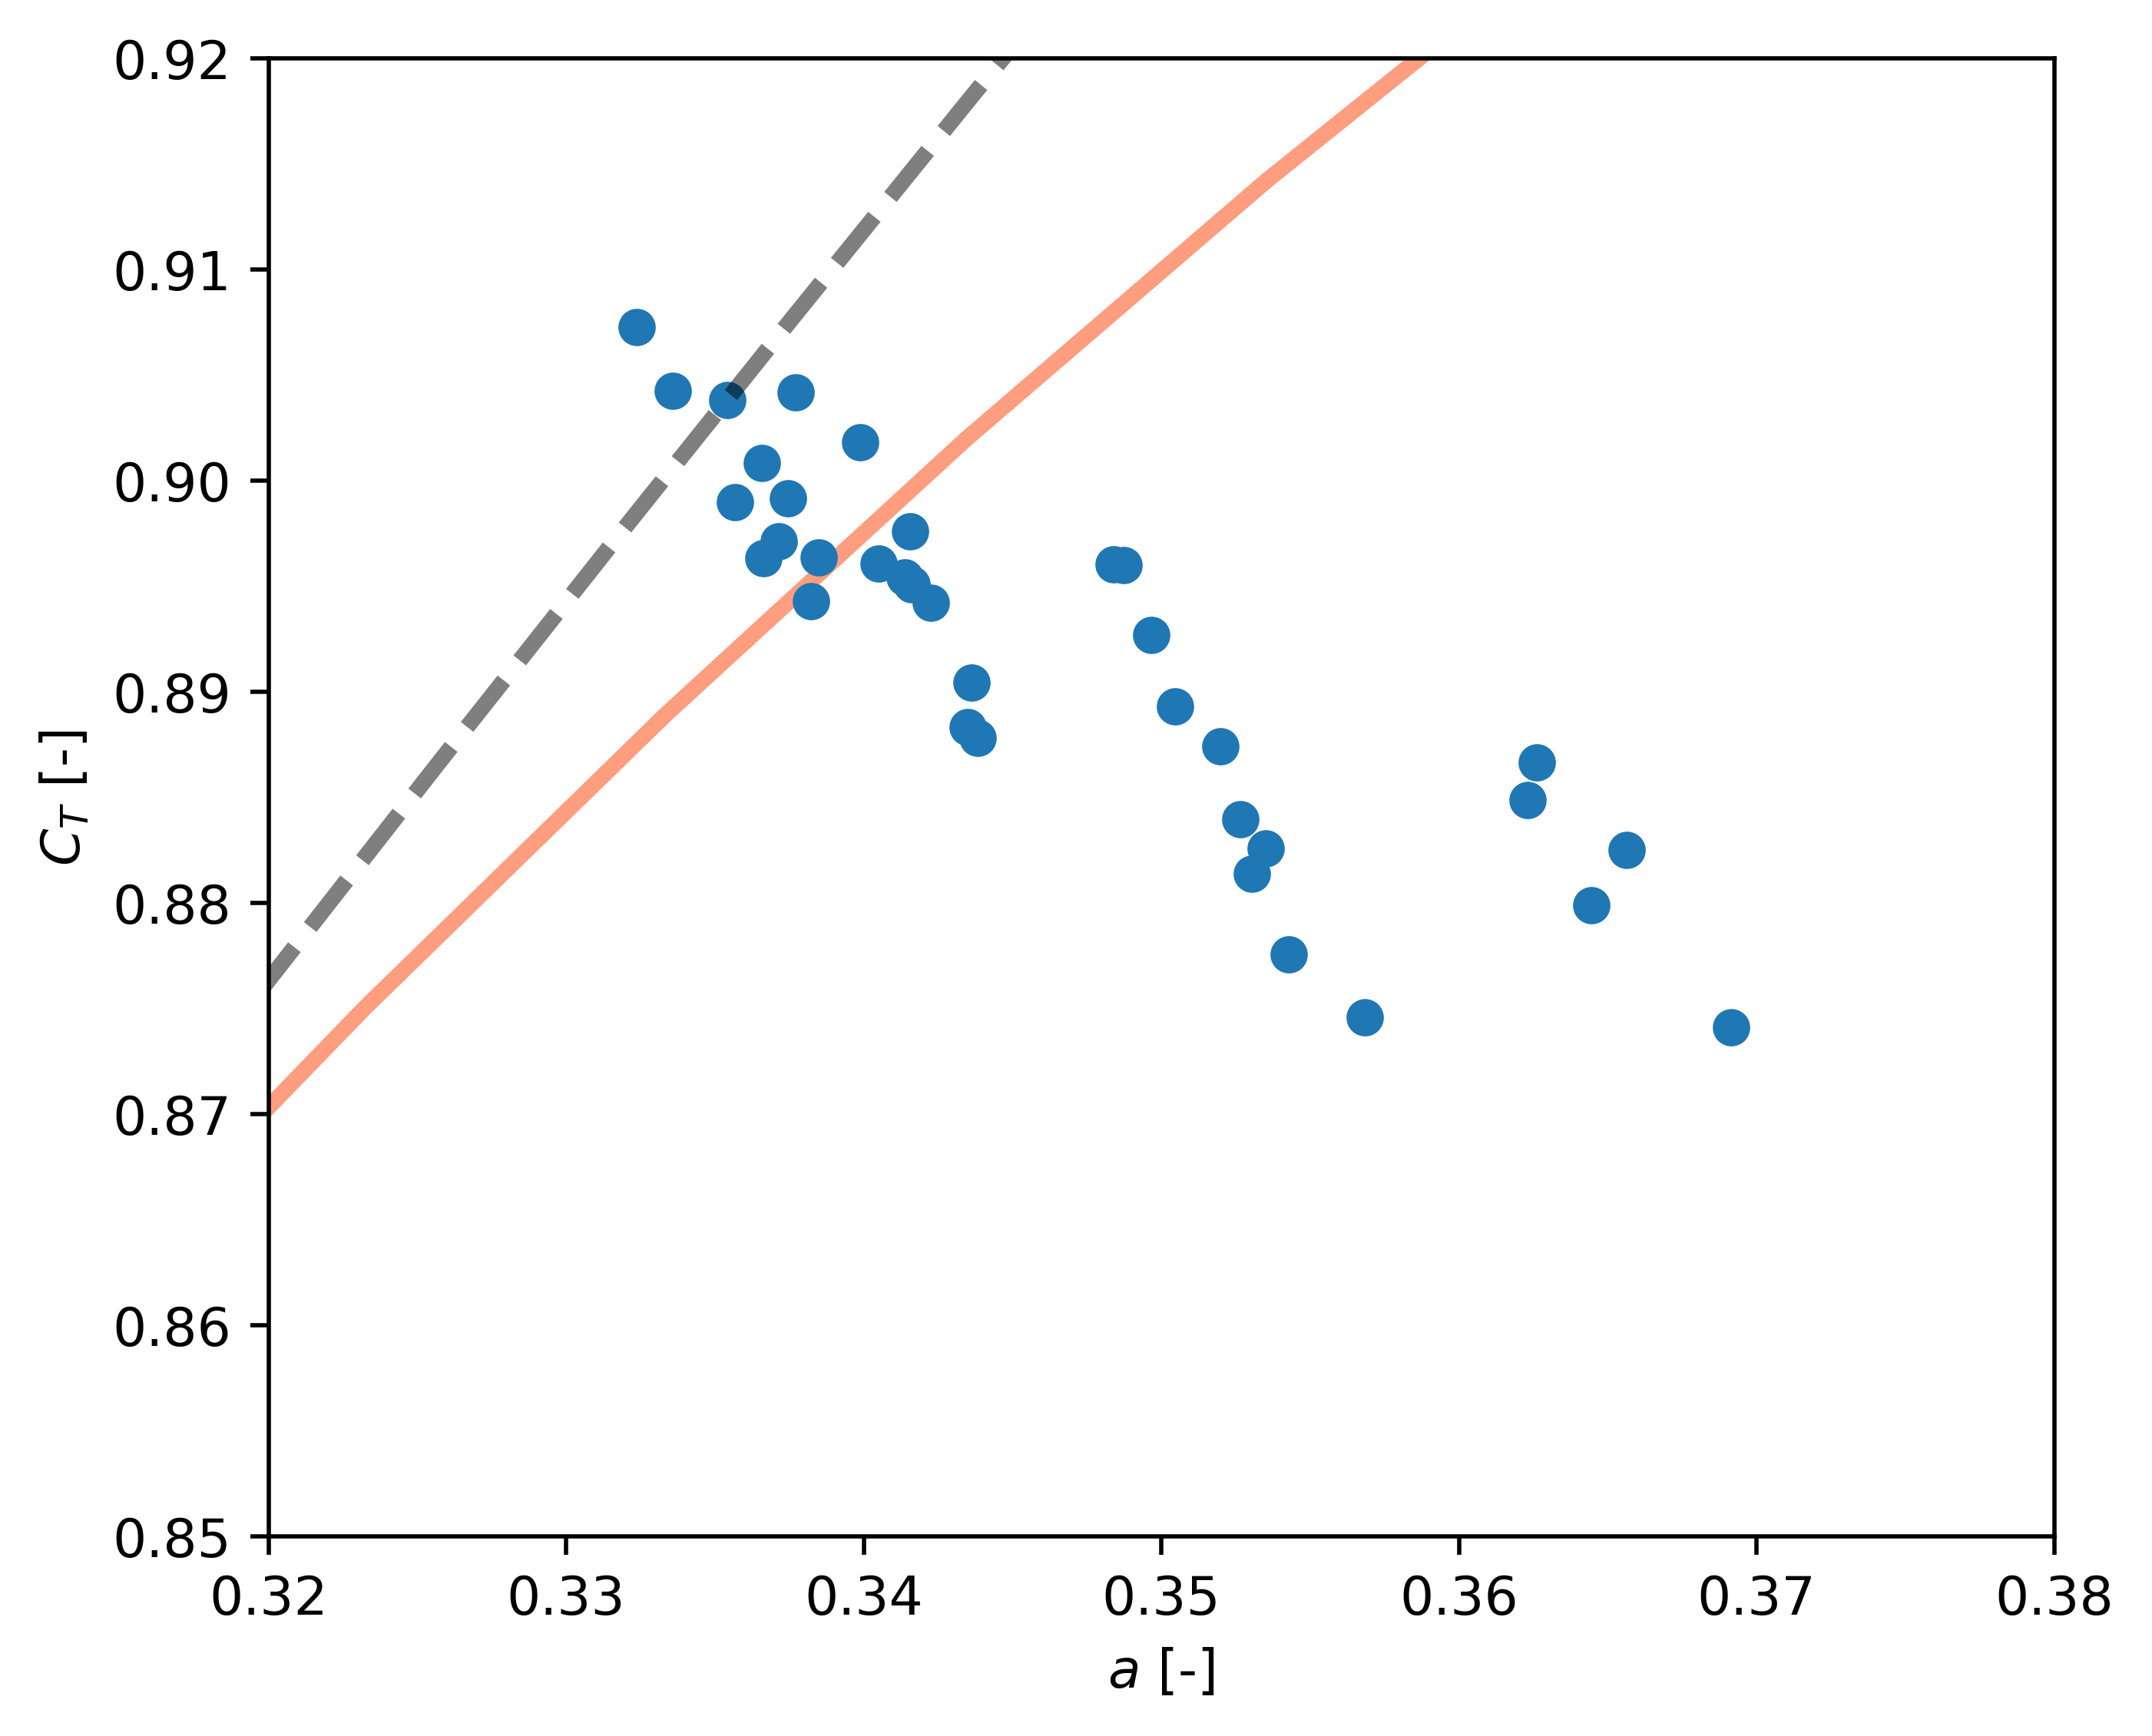

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 5))

a_mad, ct_mad = postproc.madsen_ref()
a_mom, ct_mom = postproc.classical_ref()

ax.plot(a_mom, ct_mom, '#ff3c00',linewidth=3,alpha = 0.5, zorder = 1)
ax.plot(a_mad, ct_mad, 'k--',linewidth=3,alpha=0.5,zorder=2)

ax.scatter(train_data['ind_rotor'], train_data['cot_rotor'])

ax.set_xlabel('$a$ [-]')
ax.set_ylabel('$C_T$ [-]')

# ax.set_xlim([0,0.75])
# ax.set_ylim([0,1.5])

ax.set_xlim([0.32,0.38])
ax.set_ylim([0.85,0.92])

# plt.legend(title='$U_{\infty}$ [m/s]')

plt.show()

In [7]:
gpr.print_stats(train_data)

Variable Statistics:
---------------------------------------------------------------------------
Name                 |       Mean |    Std Dev |        Min |        Max
---------------------------------------------------------------------------
r_annulus            |   50.95000 |   28.01478 |    4.01833 |   97.88167
cot_local            |    0.89653 |    0.39821 |    0.09028 |    1.58945
ind_local            |    0.32935 |    0.12719 |   -0.03939 |    0.71595
cot_annulus          |    0.89653 |    0.38869 |    0.11385 |    1.38283
ind_annulus          |    0.32935 |    0.12149 |    0.01015 |    0.51623
cot_rotor            |    0.89196 |    0.00862 |    0.87408 |    0.90726
ind_rotor            |    0.34632 |    0.00993 |    0.33238 |    0.36914
shears_rotor         |   -0.00000 |    0.01844 |   -0.02500 |    0.02500
veers_rotor          |   -0.00000 |    0.13244 |   -0.20000 |    0.20000
shears_annulus       |    0.00000 |    0.01844 |   -0.02500 |    0.02500
veers_annulus        |  

In [8]:
# Compute shear regime, generate scalars, and standardize
training_data, scalars = gpr.scale_and_encode(train_data, training=True)

cot_local: scaler trained with 1 features
ind_local: scaler trained with 1 features
cot_annulus: scaler trained with 1 features
ind_annulus: scaler trained with 1 features
cot_rotor: scaler trained with 1 features
ind_rotor: scaler trained with 1 features
shears_rotor: scaler trained with 1 features
veers_rotor: scaler trained with 1 features
shears_annulus: scaler trained with 1 features
veers_annulus: scaler trained with 1 features


In [9]:
gpr.print_stats(training_data)

Variable Statistics:
---------------------------------------------------------------------------
Name                 |       Mean |    Std Dev |        Min |        Max
---------------------------------------------------------------------------
shear_regime_rotor   |    0.25000 |    0.43301 |    0.00000 |    1.00000
shear_regime_annulus |    0.25000 |    0.43301 |    0.00000 |    1.00000
r_annulus            |   50.95000 |   28.01478 |    4.01833 |   97.88167
cot_local            |   -0.00000 |    1.00000 |   -2.02470 |    1.74009
ind_local            |    0.00000 |    1.00000 |   -2.89913 |    3.03954
cot_annulus          |   -0.00000 |    1.00000 |   -2.01364 |    1.25112
ind_annulus          |   -0.00000 |    1.00000 |   -2.62746 |    1.53827
cot_rotor            |   -0.00000 |    1.00000 |   -2.07442 |    1.77621
ind_rotor            |   -0.00000 |    1.00000 |   -1.40382 |    2.29942
shears_rotor         |   -0.00000 |    1.00000 |   -1.35582 |    1.35582
veers_rotor          |  

In [ ]:
# Generate MATLAB tables of standardized inputs

X_rot = np.column_stack([training_data['cot_rotor'], training_data['shears_rotor'], training_data['veers_rotor']])
X_ann = np.column_stack([training_data['r_annulus'].flatten(), training_data['cot_annulus'].flatten(), training_data['shears_annulus'].flatten(), training_data['veers_annulus'].flatten()])

y_rot = training_data['ind_rotor']
y_ann = training_data['ind_annulus'].flatten()

savemat(opt_params['gp_dir']+ 'wrf_10MW_ann.mat', {'X': X_ann, 'y': y_ann.reshape(-1, 1)})
savemat(opt_params['gp_dir']+ 'wrf_10MW_rot.mat', {'X': X_rot, 'y': y_rot.reshape(-1, 1)})

X_rot = np.hstack([X_rot, training_data['shear_regime_rotor']])
X_ann = np.hstack([X_ann, training_data['shear_regime_annulus']])

savemat(opt_params['gp_dir']+ 'wrf_10MW_ann_OH.mat', {'X': X_ann, 'y': y_ann.reshape(-1, 1)})
savemat(opt_params['gp_dir']+ 'wrf_10MW_rot_OH.mat', {'X': X_rot, 'y': y_rot.reshape(-1, 1)})

# USE save_dataset

In [14]:
with open(os.path.join(opt_params['gp_dir'], 'scaler_wrf_cot_ann.pkl'), 'wb') as f:
    pickle.dump(scalars['scaler_cot_annulus'], f)

with open(os.path.join(opt_params['gp_dir'], 'scaler_wrf_ind_ann.pkl'), 'wb') as f:
    pickle.dump(scalars['scaler_ind_annulus'], f)

with open(os.path.join(opt_params['gp_dir'], 'scaler_wrf_cot_rot.pkl'), 'wb') as f:
    pickle.dump(scalars['scaler_cot_rotor'], f)

with open(os.path.join(opt_params['gp_dir'], 'scaler_wrf_ind_rot.pkl'), 'wb') as f:
    pickle.dump(scalars['scaler_ind_rotor'], f)

with open(os.path.join(opt_params['gp_dir'], 'scaler_shears_rot.pkl'), 'wb') as f:
    pickle.dump(scalars['scaler_shears_rotor'], f)

with open(os.path.join(opt_params['gp_dir'], 'scaler_veers_rot.pkl'), 'wb') as f:
    pickle.dump(scalars['scaler_veers_rotor'], f)

with open(os.path.join(opt_params['gp_dir'], 'scaler_shears_ann.pkl'), 'wb') as f:
    pickle.dump(scalars['scaler_shears_annulus'], f)

with open(os.path.join(opt_params['gp_dir'], 'scaler_veers_ann.pkl'), 'wb') as f:
    pickle.dump(scalars['scaler_veers_annulus'], f)

with open(os.path.join(opt_params['gp_dir'], 'encoder_rot.pkl'), 'wb') as f:
    pickle.dump(scalars['encoder_rotor'], f)

with open(os.path.join(opt_params['gp_dir'], 'encoder_ann.pkl'), 'wb') as f:
    pickle.dump(scalars['encoder_annulus'], f)